# MNIST DATA with Convolutional Neural Network

## 1. Import Packages

In [1]:
import input_data
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import load_model
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

Using TensorFlow backend.


Instructions for updating:
non-resource variables are not supported in the long term


## 2. Explore MNIST Data

In [4]:
mnist_images = input_data.read_data_sets("./mnist_data", one_hot=False)

Extracting ./mnist_data\train-images-idx3-ubyte.gz
Extracting ./mnist_data\train-labels-idx1-ubyte.gz
Extracting ./mnist_data\t10k-images-idx3-ubyte.gz
Extracting ./mnist_data\t10k-labels-idx1-ubyte.gz


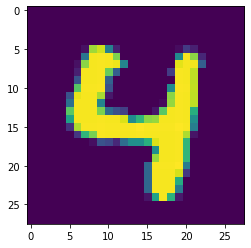

In [5]:
#  Example of a picture
pic,real_values = mnist_images.train.next_batch(25)

index = 11 # changeable with 0 ~ 24 integer
image = pic[index,:]
image = np.reshape(image,[28,28])
plt.imshow(image)
plt.show()

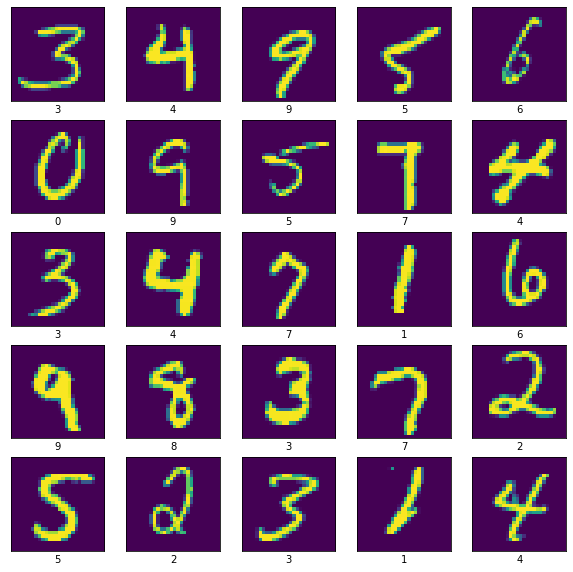

In [7]:
# Explore MNIST data

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image = np.reshape(pic[i,:] , [28,28])
    plt.imshow(image)
    plt.xlabel(real_values[i])
plt.show()

## 3. Make Dataset

In [7]:
# Download Data : http://yann.lecun.com/exdb/mnist/
# Data input script : https://github.com/tensorflow/tensorflow/tree/master/tensorflow/examples/tutorials/mnist

mnist = input_data.read_data_sets("./samples/MNIST_data/", one_hot=True)

Extracting ./samples/MNIST_data/train-images-idx3-ubyte.gz
Extracting ./samples/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./samples/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./samples/MNIST_data/t10k-labels-idx1-ubyte.gz


In [8]:
print("the number of train examples :" , mnist.train.num_examples)
print("the number of test examples :" , mnist.test.num_examples)

the number of train examples : 55000
the number of test examples : 10000


In [9]:
x_train = mnist.train.images.reshape(55000, 28, 28, 1)
x_test = mnist.test.images.reshape(10000, 28, 28, 1)
y_train = mnist.train.labels
y_test = mnist.test.labels

## 4. Building my neural network in tensorflow

In [19]:
batch_size = 128
num_classes = 10
epochs = 50

In [20]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same',
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1024)             

In [22]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
hist = model.fit(x_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1, 
                 validation_data=(x_test, y_test))

Train on 55000 samples, validate on 10000 samples
Epoch 1/50
55000/55000 [==============================] - 85s 2ms/step - loss: 1.2631 - accuracy: 0.6072 - val_loss: 0.3239 - val_accuracy: 0.9107
Epoch 2/50
55000/55000 [==============================] - 88s 2ms/step - loss: 0.3708 - accuracy: 0.8858 - val_loss: 0.2013 - val_accuracy: 0.9402
Epoch 3/50
55000/55000 [==============================] - 87s 2ms/step - loss: 0.2608 - accuracy: 0.9207 - val_loss: 0.1504 - val_accuracy: 0.9552
Epoch 4/50
55000/55000 [==============================] - 92s 2ms/step - loss: 0.2065 - accuracy: 0.9366 - val_loss: 0.1228 - val_accuracy: 0.9616
Epoch 5/50
55000/55000 [==============================] - 91s 2ms/step - loss: 0.1751 - accuracy: 0.9471 - val_loss: 0.1047 - val_accuracy: 0.9662
Epoch 6/50
55000/55000 [==============================] - 89s 2ms/step - loss: 0.1541 - accuracy: 0.9521 - val_loss: 0.0940 - val_accuracy: 0.9691
Epoch 7/50
55000/55000 [==============================] - 91s 2ms/st

## 5. Calculate Accuracy

In [23]:
score1 = model.evaluate(x_train, y_train, verbose=0)
score2 = model.evaluate(x_test, y_test, verbose=0)
print('Train accuracy:', score1[1])
print('Test accuracy:', score2[1])

Train accuracy: 0.9936909079551697
Test accuracy: 0.9904000163078308


## 6. Check a prediction

In [24]:
predictions = model.predict(x_test)

In [25]:
predictions[101]

array([9.9999607e-01, 3.3771885e-10, 2.7141516e-08, 1.3702549e-11,
       2.9556857e-11, 6.2845267e-08, 3.8045785e-06, 2.5531390e-09,
       3.3442760e-08, 1.2291128e-08], dtype=float32)

0


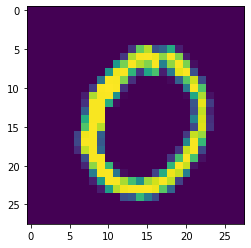

In [27]:
print(np.argmax(predictions[101]))  # highest confidence
# This model is convinced that this image is "1"

plt.imshow(x_test[101].reshape(28,28))

## 7. Save model

In [37]:
# Save model
model_json = model.to_json()
with open("model.json", "w") as json_file : 
    json_file.write(model_json)
    
# Save model weights
model.save_weights("model_weight.h5")
print("Saved model to disk")

Saved model to disk


In [10]:
# evaluate
loaded_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
train_score = loaded_model.evaluate(x_train, y_train, verbose=0)
test_score = loaded_model.evaluate(x_test, y_test, verbose=0)
 
print('training accuracy : ' + str(train_score[1]))
print('test accuracy : ' + str(test_score[1]))

training accuracy : 0.9936909079551697
test accuracy : 0.9904000163078308
